<a href="https://colab.research.google.com/github/vitorqueijo/clickbait/blob/master/clickbait_buzzfeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP with spaCy on clickbait buzzfeed titles

by Vítor Queijo, Science and Technology graduation student

In [1]:
!pip install -q spacy
!python -m spacy download pt


    Linking successful
    /usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/pt

    You can now load the model via spacy.load('pt')



In [0]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
npl = spacy.load('pt')
data = pd.read_csv('clickbait_titles.csv')
data.head()

,Unnamed: 0,timestamp,title,url
0,0,2018-05-18 19:22:06,"20 imagens que, por incrível que pareça, não s...",https://www.buzzfeed.com/daves4/animais-penis-...
1,1,2018-05-16 17:24:04,24 filmes da Disney explicados por homens que ...,https://www.buzzfeed.com/keelyflaherty/filmes-...
2,2,2018-05-15 17:39:34,Todo mundo é uma princesa da Disney OU um heró...,https://www.buzzfeed.com/perpetua/teste-prince...
3,3,2018-05-10 19:57:22,Quais são as três comidas que combinam com a s...,https://www.buzzfeed.com/joannaborns/teste-tre...
4,4,2018-04-27 21:17:34,Este teste sobre comida vai dizer de uma vez p...,https://www.buzzfeed.com/joannaborns/teste-com...


## Let's get riddle of some columns

In [4]:
data = data.drop(['url', 'Unnamed: 0'], axis=1)
data.head()

,timestamp,title
0,2018-05-18 19:22:06,"20 imagens que, por incrível que pareça, não s..."
1,2018-05-16 17:24:04,24 filmes da Disney explicados por homens que ...
2,2018-05-15 17:39:34,Todo mundo é uma princesa da Disney OU um heró...
3,2018-05-10 19:57:22,Quais são as três comidas que combinam com a s...
4,2018-04-27 21:17:34,Este teste sobre comida vai dizer de uma vez p...


## Now, let's clean the text, fortunately spaCy is an amazing tool and it can identify easily each word's POS tagging, e.g. stop words

In [0]:
from spacy.lang.pt.stop_words import STOP_WORDS
import string

In [0]:
from spacy.lang.pt import Portuguese
filtro = list(STOP_WORDS)
pontu = string.punctuation
parser = Portuguese()
blacklist = {'a', 'e', 'o', 'que'}

In [0]:
def token_pt(titulos):
  tokens = parser(titulos)
  tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
  tokens = [word for word in tokens if word not in filtro and word not in pontu]
  tokens = [word for word in tokens if word not in blacklist]
  return tokens

In [8]:
data['token'] = data.title.apply(token_pt)
data.head()

,timestamp,title,token
0,2018-05-18 19:22:06,"20 imagens que, por incrível que pareça, não s...","[20, imagem, incrível, parecer, pirocas, enorme]"
1,2018-05-16 17:24:04,24 filmes da Disney explicados por homens que ...,"[24, filme, disney, explicar, homem, entender,..."
2,2018-05-15 17:39:34,Todo mundo é uma princesa da Disney OU um heró...,"[mundo, umar, príncipe, disney, herói, marvel, –]"
3,2018-05-10 19:57:22,Quais são as três comidas que combinam com a s...,"[comido, combinar, suar, personalidade]"
4,2018-04-27 21:17:34,Este teste sobre comida vai dizer de uma vez p...,"[testar, sobrar, comido, umar, mau, pessoa]"


# Bag of Words Method (or something like that)

...and using an some of "jerry-rigged" oriented programming... (thanks David S. Batista)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

def dummy_fun(doc):
    return doc

train_list = data.token.tolist()

## Sklearn will help us to extract the TF-IDF from the token column, on other words, we'll calculate the frequencie of a term in the whole dataset

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer=dummy_fun, lowercase=False, preprocessor = None)
bow = cv.fit_transform(train_list)

In [11]:
tfidf_trans = TfidfTransformer()
tfidf_trans.fit(bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

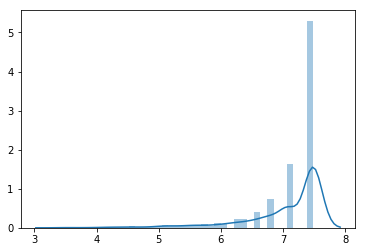

In [12]:
df_idf = pd.DataFrame(tfidf_trans.idf_, index=cv.get_feature_names(),columns=["tf_idf_weights"])
idf_tf = df_idf.sort_values(by=['tf_idf_weights'], ascending = False)
sns.distplot(idf_tf)

In [13]:
idf_tf.shape

(2128, 1)

# For this short technique (but extremly useful), let's make a wordcloud out of it
...and get in the "buzzfeed vibe"

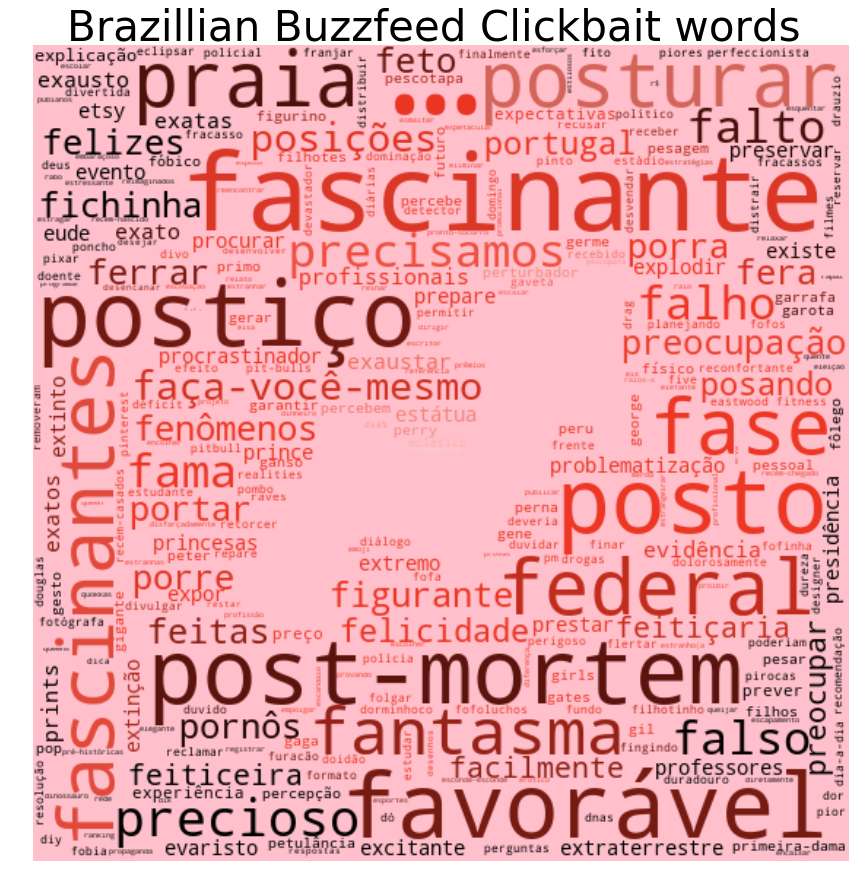

In [14]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
mask = np.array(Image.open("logo.png"))
wordcloud = WordCloud(background_color="pink", mode="RGBA", max_words=300, mask=mask)
wordcloud.generate_from_frequencies(frequencies=idf_tf.tf_idf_weights)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,15])
plt.title("Brazillian Buzzfeed Clickbait words ", fontsize=42)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("buzzcloud.png", format="png")


That's all folks!

In [15]:
print("print('thank you for coming to my ted talk')")

print('thank you for coming to my ted talk')
